## ***Project: Building Neural Network for Classifying Clothing Items from Fashion MNIST dataset.***
- Experimentations performed:
  - 1. Importing Fashion MNIST dataset from keras library.
  - 2. Explore the dataset and data format.
  - 3. Normalize dataset for better training.
  - 4. Build basic NN model with input, output and single hidden layer with 128   neurons.
  - 5. View the model summary.
  - 6. Evaluate model accuracy on test dataset and note it.
  - 7. Experimentations with model include:
	  - 1. Effect of Droping input layer.
	  - 2. Effect of Additional hidden layer on accuracy and training time.
	  - 3. Effect of increase in the number of neurons on accuracy and training time.
	  - 4. Effect of increase in number of epochs on accuracy.
	  - 5. Concept of Overfitting.
	  - 6. Using un-normalized data for training and its effect on accuracy.
	  - 7. Reducing the overfitting by writting custome function for accuracy monitization. 

## Start Coding

Let's start with importing TensorFlow module:

In [1]:
import tensorflow as tf
#Print the version of it:
print(tf.__version__)

2.2.0


We will train a Neural Network to recognize items of clothing from a dataset called **Fasion MNIST**. It contains **70,000 images of items of clothings** in 10 different categories. Each image of item of clothing is in 28x28 pixels sized. We can see here:
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The Fasion MNIST data is available directly in **tf.keras.datasets** API and we can load it like following:

In [0]:
mnist_dataset = tf.keras.datasets.fashion_mnist

In [0]:
#Print the status of mnist_dataset variable:
print(mnist_dataset)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


Calling **load_data** on this **mnist_dataset** object will give us **2 sets of 2 lists **,which are the Training and Testing values for the Graphics that contain the clothing items and their labels:

In [0]:
(training_images,training_labels),(test_images,test_labels) = mnist_dataset.load_data()

Let's print training image and associated label to see how the data looks like.

In [0]:
import matplotlib.pyplot as plt

Training Label:
1
Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168
  122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169
  144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163
  148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168
  139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175
  131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

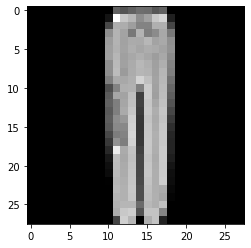

In [0]:
#Seeing the image at index 0:
print("Training Label:")
print(training_labels[1000])

print("Training Image:")
print(training_images[1000])

#View the actual image:
plt.imshow(training_images[1000],cmap='gray',vmin=0,vmax=255)
plt.show()

We can notice that all the values are between 0 to 255. During training the Neural Network its easier for the network to train itself if the values are between in the **range 0 to 1**. This process is called **Normalization**.

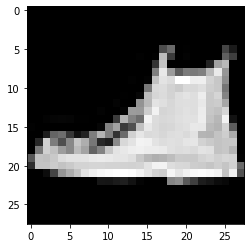

In [0]:
#Let's view the image at different position:
plt.imshow(training_images[450],cmap='gray',vmin=0,vmax=255)
plt.show()

In [0]:
#Let's check the shape of the training and test datasets:
training_images.shape

(60000, 28, 28)

In [0]:
#Check the labels:
training_labels.shape

(60000,)

In [0]:
#View the dimensions of the training and test datasets:
training_images.ndim

3

In [0]:
#View the min and max values of the numbers(pixel intencity value) from training and test images:
training_images.max()

255

In [0]:
training_images.min()

0

Normalize the data:

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [0]:
#Check training and testing data shape,min and max number:
training_images.shape

(60000, 28, 28)

In [0]:
#Check shape again:
test_images.shape

(10000, 28, 28)

In [0]:
training_labels.shape

(60000,)

In [0]:
test_labels.shape

(10000,)

In [0]:
#Max value:Training images
training_images.max()

1.0

In [0]:
#Min value:Training images
training_images.min()

0.0

In [0]:
#Max value:Test images:
test_images.min()

0.0

In [0]:
#Min value:Test images:
test_images.min()

0.0

Let's Design the Model:

In [0]:
 model_new = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                                tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
print(model_new)

In [0]:
model_new.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now, our model is defined. So, let's build it using **compiling** it:

In [0]:
#Configures the model for training:
model_new.compile(optimizer = tf.keras.optimizers.Adam(),loss =tf.keras.losses.sparse_categorical_crossentropy,metrics = ['accuracy'])

In [0]:
#Train the model by fitting the Training Data to lables:
model_new.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2336 - accuracy: 0.9124
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2247 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2179 - accuracy: 0.9181
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2101 - accuracy: 0.9212
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2039 - accuracy: 0.9223


We can see that the accuracy value at the end of final epoch is 0.9223 which tells us that our Neural Network is **92% accurate in classifying the Training Data**. This means that it figured out a pattern match between the image and label that worked 91% of the time. 

In [0]:
#Now,let's see the accuracy on test dataset:
model_new.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8872


[0.34537309408187866, 0.8871999979019165]

We can see that we have got 0.8872 which means the model was 88% accurate.

Let's explore the further things:

Let's create a set of classifications for each image in the test image dataset and then prints the first entry in the classifications. The ourput after we run the following code is a list of numbers. Let's see:

In [0]:
classifications = model_new.predict(test_images)

In [0]:
type(classifications)

numpy.ndarray

In [0]:
classifications.shape

(10000, 10)

In [0]:
len(classifications[0])

10

In [0]:
#Print the first classification:
#1st row in an array-->
print(classifications[0])

[9.2031707e-09 7.0898087e-14 2.7658806e-10 7.4765742e-13 3.3091748e-15
 1.5456628e-04 4.1208256e-11 7.2020465e-03 2.2415507e-09 9.9264342e-01]


What does this list tells us:
This tells us that it's the **Probability** that this item is belongs to each of the 10 classes.

In [0]:
#Print test labels:
print(test_labels[0])

9


In [0]:
import numpy as np


In [0]:
np.max(classifications[0])

0.9926434

In [0]:
np.argmax(classifications[0])

9

From the above code, we can tells that the highest probability value in that list is **0.9926434 which around 99%** and the index position of that probability in list is **9**.So, we can conclude that the given image is categorized into **class 9** which is **Ankle Boot.**  
### How do you know that this list tells you that the item is an ankle boot?
Both the list and labels are 0 based index, so the Ankle Boot which having label 9 means that it is the 10th of the 10 classes.The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

### Experimentation with number of Neurons:
- Change the number of Neurons in Dense Layer and observe it's effect on:
 - Model accuracy
 - Training Time etc.

In [0]:
#Import required libraries/depencies:
import tensorflow as tf

#Print tensorflow version:
print(tf.__version__)

#Load the dataset:
mnist_dataset_2 = tf.keras.datasets.fashion_mnist

#Calling on mnist_dataset_2 object to retrive train and test datasets:
(training_images,training_labels),(test_images,test_labels) = mnist_dataset.load_data()

#Normalize the dataset for better training:
training_images = training_images/255.0
test_images = test_images/255.0

#Construct the model:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,tf.nn.softmax)])

#Configure the model for training:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Fit the Training images with labels:
model_2.fit(training_images,training_labels,epochs=5)

2.2.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4681 - accuracy: 0.8305
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3555 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3196 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2949 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2770 - accuracy: 0.8979


In [0]:
#Evaluate the accuracy on Test dataset:
model_2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8794


[0.3375718593597412, 0.8794000148773193]

By adding more neurons in the layer results **in longer time for model training**. But this gives advantage in **increase in prediction accuracy**.

### Effect of Droping input layer:

If we remove the first layer i.e. **Flatten() layer** we get the an error about the shape of the input data. There is a rule of thumb that the **first layer in any Neural Network should be the same shape as the data.** In our case, the input image shape is 28 x 28 pixels so **28 layers of 28 Neurons** would be infeasible and timecosuming to construct. So, it makes more sense to **flatten that 28 x 28 into 784 x 1**. So, the resulting input image converts from Matrix format to Vector format which contain **784 rows and 1 column**.  

In [3]:
import tensorflow as tf
print(tf.__version__)

mnist_3 = tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels) = mnist_3.load_data()

#Normalize the data:
training_images = training_images / 255.0
test_images = test_images / 255.0

#Model building:
model_3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
'''
model_3 = tf.keras.models.Sequential([tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
'''
#Configure the model for training:
model_3.compile(optimizer='adam',
                loss=tf.keras.losses.sparse_categorical_crossentropy)

#Fit the training data with labels:
model_3.fit(training_images,training_labels,epochs=5)

#Evaluate model accuracy on test data:
model_3.evaluate(test_images,test_labels)

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1127
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0563
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0765


0.07651972770690918

Another rule of thumb -- the number of **Neurons in the last layer** should match the **Number of classes** we are classifying for. In our case it's the class of items from 0-9, so there are 10 of them, hence we should have 10 neurons in our final layer.

### Effect of Additional hidden layers:

In [5]:
#Import tensorflow module:
import tensorflow as tf

#Load the Fashion MNIST dataset:
mnist_4 = tf.keras.datasets.fashion_mnist

#Create an Object of the dataset:
(training_images,training_labels),(test_images,test_labels) = mnist_4.load_data()

#Normalize training and testing dataset:
training_images = training_images / 255.0
test_images = test_images / 255.0

#Build the model with extra hidden layers:
model_4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#Configure the model for training:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

#Fit the training data with labels and start training for 5 epochs:
model_4.fit(training_images,training_labels,epochs=5)

#Evaluate the model accuracy on test data:
model_4.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4779 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3686 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3335 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3051 - accuracy: 0.8868
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8777


[0.33626702427864075, 0.8776999711990356]

**Conclusion: There isn't a significant impact** -- because this is relatively simple data. For far more complex data (including **color images** to be classified as flowers ), extra layers are often necessary at that time.

### Increase the number of epochs:

- Training with **25 Epochs**:

In [6]:
#Import tensorflow module:
import tensorflow as tf

#Load the Fashion MNIST dataset:
mnist_4 = tf.keras.datasets.fashion_mnist

#Create an Object of the dataset:
(training_images,training_labels),(test_images,test_labels) = mnist_4.load_data()

#Normalize training and testing dataset:
training_images = training_images / 255.0
test_images = test_images / 255.0

#Build the model with extra hidden layers:
model_4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#Configure the model for training:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

#Fit the training data with labels and start training for 25 epochs:
model_4.fit(training_images,training_labels,epochs=25)

#Evaluate the model accuracy on test data:
model_4.evaluate(test_images,test_labels)

Epoch 1/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4758 - accuracy: 0.8272
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3680 - accuracy: 0.8660
Epoch 3/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3339 - accuracy: 0.8780
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3074 - accuracy: 0.8842
Epoch 5/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2874 - accuracy: 0.8921
Epoch 6/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2747 - accuracy: 0.8964
Epoch 7/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2617 - accuracy: 0.9018
Epoch 8/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2540 - accuracy: 0.9037
Epoch 9/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2429 - accuracy: 0.9080
Epoch 10/25
1875/1875 [==============================] - 20s 11m

[0.47523802518844604, 0.885200023651123]

- Training with **30 epochs:**

In [7]:
#Import tensorflow module:
import tensorflow as tf

#Load the Fashion MNIST dataset:
mnist_4 = tf.keras.datasets.fashion_mnist

#Create an Object of the dataset:
(training_images,training_labels),(test_images,test_labels) = mnist_4.load_data()

#Normalize training and testing dataset:
training_images = training_images / 255.0
test_images = test_images / 255.0

#Build the model with extra hidden layers:
model_4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#Configure the model for training:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

#Fit the training data with labels and start training for 30 epochs:
model_4.fit(training_images,training_labels,epochs=30)

#Evaluate the model accuracy on test data:
model_4.evaluate(test_images,test_labels)

Epoch 1/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4769 - accuracy: 0.8245
Epoch 2/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3663 - accuracy: 0.8656
Epoch 3/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3329 - accuracy: 0.8787
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3097 - accuracy: 0.8856
Epoch 5/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2911 - accuracy: 0.8909
Epoch 6/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2758 - accuracy: 0.8971
Epoch 7/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2658 - accuracy: 0.8994
Epoch 8/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2533 - accuracy: 0.9044
Epoch 9/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2453 - accuracy: 0.9075
Epoch 10/30
1875/1875 [==============================] - 21s 11m

[0.5744760036468506, 0.885699987411499]

- With 25 epochs -- we'll probably get a model with a much better loss than the one with 5. 
- With 30 epochs -- We might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' and it's something we need to keep an eye out when training neural networks. There's no point in wasting the time in training if we aren't improving your loss.

### Training the Neural Network without Normalizing the Dataset:

In [8]:
#Import tensorflow module:
import tensorflow as tf

#Load the Fashion MNIST dataset:
mnist_4 = tf.keras.datasets.fashion_mnist

#Create an Object of the dataset:
(training_images,training_labels),(test_images,test_labels) = mnist_4.load_data()

#Normalize training and testing dataset:
#training_images = training_images / 255.0
#test_images = test_images / 255.0

#Build the model with extra hidden layers:
model_4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#Configure the model for training:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

#Fit the training data with labels and start training for 15 epochs:
model_4.fit(training_images,training_labels,epochs=15)

#Evaluate the model accuracy on test data:
model_4.evaluate(test_images,test_labels)

Epoch 1/15
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2169 - accuracy: 0.7254
Epoch 2/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5247 - accuracy: 0.8162
Epoch 3/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4917 - accuracy: 0.8279
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4630 - accuracy: 0.8379
Epoch 5/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4562 - accuracy: 0.8400
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4397 - accuracy: 0.8466
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4259 - accuracy: 0.8493
Epoch 8/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4073 - accuracy: 0.8523
Epoch 9/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4419 - accuracy: 0.8309
Epoch 10/15
1875/1875 [==============================] - 22s 12m

[0.4475480020046234, 0.8539000153541565]

**Conclusion:** Training the model without Normalizing the input data impact directly on the accuracy of the model. From above, we can see that the accuracy after final epoch is less as compared with Trained model with Normalized data.

### **Reducing the Overfitting:**

- Earlier when we trained for extra epochs we had an issue where our loss might change. It might have taken a bit of time to wait for the training to do that, and we might have thought '***wouldn't it be nice if I could stop the training when I reach a desired value?***' -- i.e. 95% accuracy might be enough for us, and if we reach that after 3 epochs, why sit around waiting for to finish a lot more epochs.

In [12]:
#Import tensorflow module:
import tensorflow as tf
print(tf.__version__)

#Define a class named myCallBack:
class myCallBack(tf.keras.callbacks.Callback):
  #Define a function(method):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') > 0.9:
      print('\nReached 90% accuracy so stopped further training!')
      self.model.stop_training = True

#Create an Object of the class:
call_backs = myCallBack()

#Import the dataset from keras:
mnist_5 = tf.keras.datasets.fashion_mnist

#Create an Object from it:
(training_images,training_labels),(test_images,test_labels) = mnist_5.load_data()

#Normalize the train and test dataset:
training_images = training_images / 255.0
test_images = test_images / 255.0

#Build the model:
model_5 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#Configure the model for training:
model_5.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#Fit the Training data and associated labels:
model_5.fit(training_images,training_labels,epochs=10,callbacks=[call_backs])

2.2.0
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4792 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3282 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.8990
Epoch 7/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9025
Reached 90% accuracy so stopped further training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9024
